In [363]:
#importing necessary modules
import numpy as np 
import pandas as pd
import seaborn as sns

In [364]:
#reading the dataset
df = pd.read_csv("E://Datasets//Mall_customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [365]:
#head of the dataset
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [366]:
#describing the dataset
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [367]:
#info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [368]:
#correlation on the dataset
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


In [369]:
#printing the columns
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [370]:
#Counting null values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

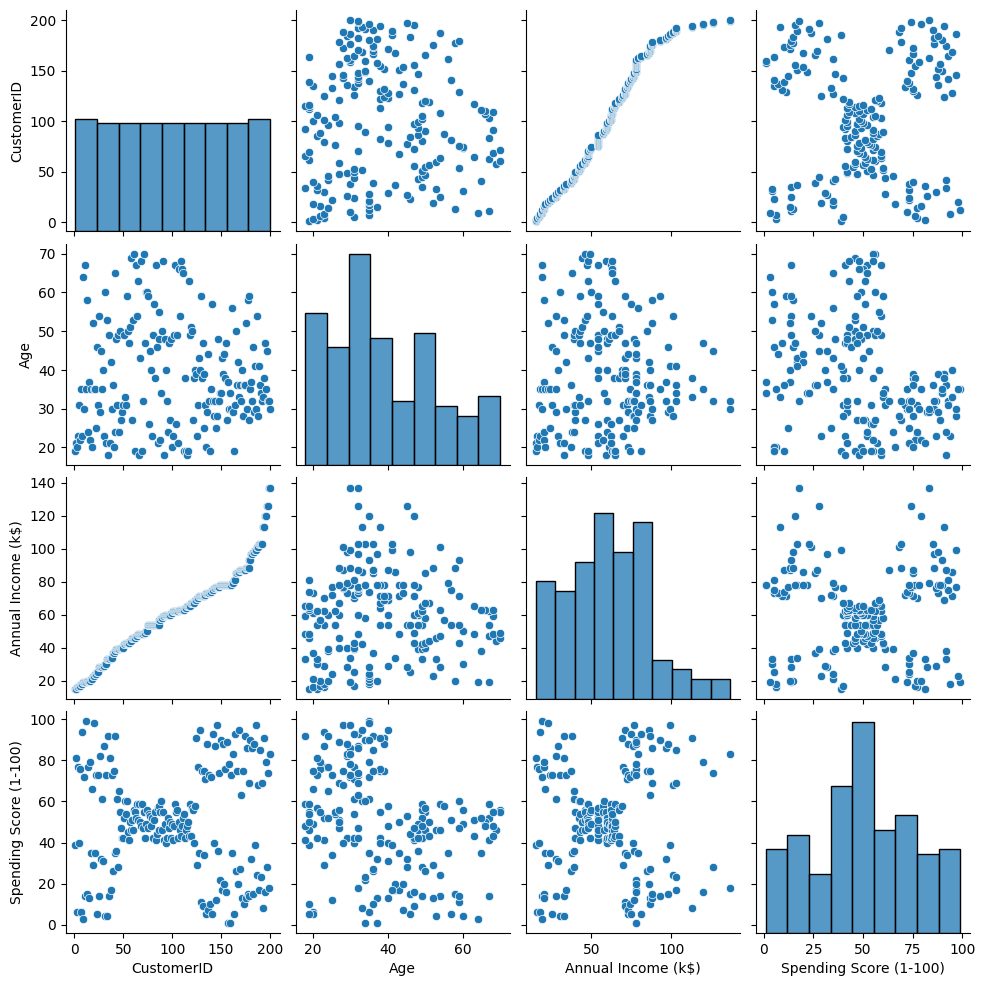

In [371]:
#pairplot on the dataset
sns.pairplot(df)

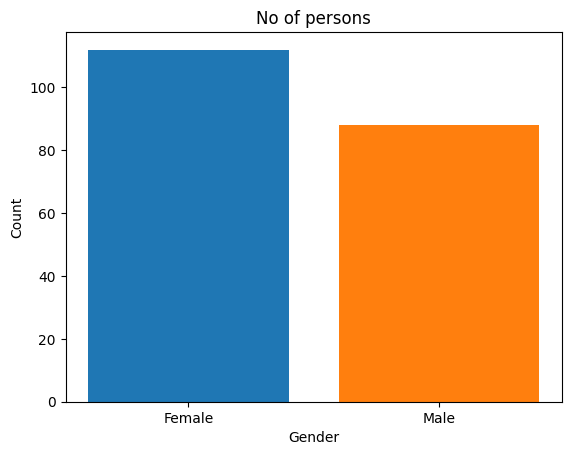

In [372]:
#counting male and female counts
A = df['Gender'].value_counts()
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("No of persons")
for i in A.index:
    plt.bar(i,A[i])
plt.show()

(array([24., 22., 28., 38., 30., 36.,  8.,  6.,  4.,  4.]),
 array([ 15. ,  27.2,  39.4,  51.6,  63.8,  76. ,  88.2, 100.4, 112.6,
        124.8, 137. ]),
 <BarContainer object of 10 artists>)

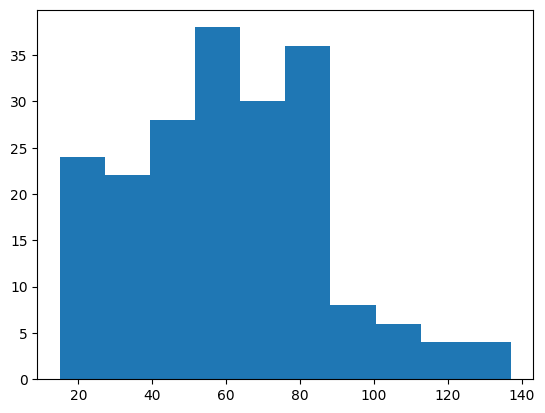

In [373]:
#salary visualization through histogram
plt.hist(df['Annual Income (k$)'])

(array([16., 20., 10., 17., 35., 37., 11., 24., 14., 16.]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <BarContainer object of 10 artists>)

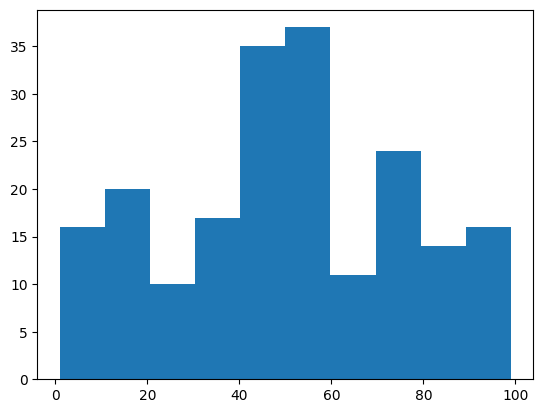

In [374]:
#histogram of spending score
plt.hist(df['Spending Score (1-100)'])

In [375]:
df['Gender'] = df['Gender'].map({'Male':0,'Female':1})

<AxesSubplot:>

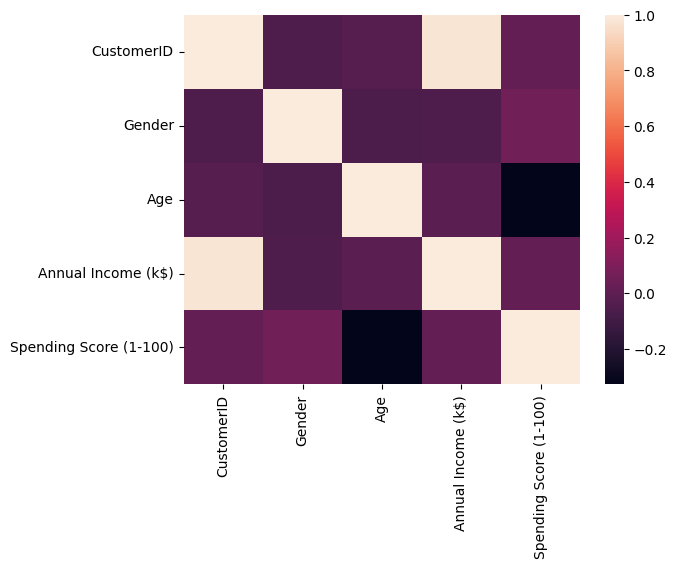

In [376]:
#heatmap on the dataset
sns.heatmap(df.corr(),cbar=True)

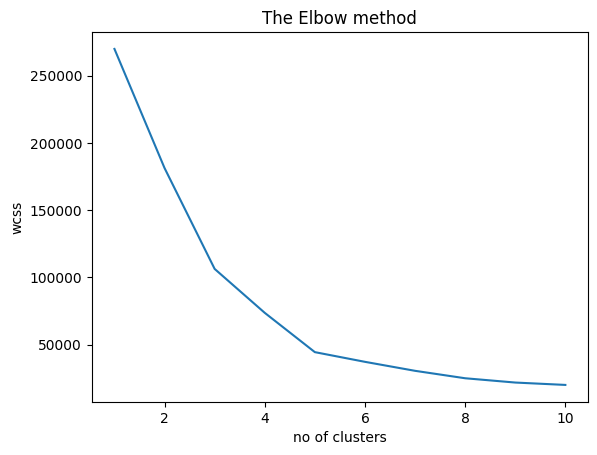

In [377]:
#Finding min-samples count by Elbow method
from sklearn.cluster import KMeans
df2 = df[['Annual Income (k$)','Spending Score (1-100)']]
wc=[]
for i in range(1,11):
    B = KMeans(n_clusters=i,init='k-means++',random_state = 2)
    B.fit(df2)
    wc.append(B.inertia_)
plt.xlabel("no of clusters")
plt.ylabel("wcss")
plt.title("The Elbow method")
plt.plot(range(1,11),wc)

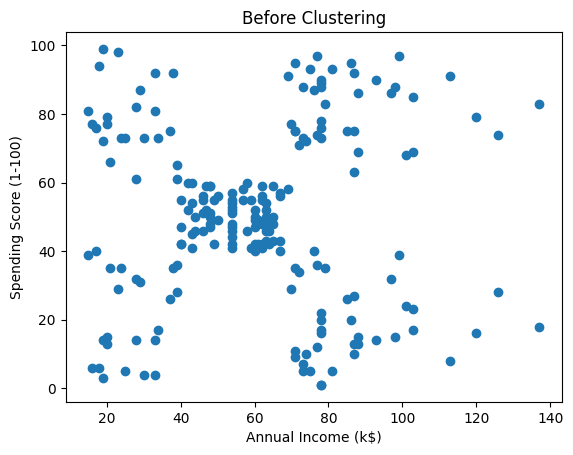

In [378]:
#visualizing old-data
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Before Clustering")
plt.scatter(df2.iloc[:,0],df2.iloc[:,1])

In [379]:
#using clustering algorithm DBSCAN from sklearn
from sklearn.cluster import DBSCAN
model = DBSCAN(eps = 5,min_samples=5)
model


DBSCAN(eps=5)

In [380]:
df = df.iloc[:,-2:]
df


,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [381]:
#fitting and predict the model 
labels = model.fit_predict(df)
labels

array([-1,  0, -1,  0, -1,  0, -1, -1, -1,  0, -1, -1, -1,  0, -1,  0, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1, -1,  2, -1,  4,  3,  2,  3,  2, -1,  2,  3,  4,
        3,  2,  3,  2,  3,  4, -1,  4,  3,  4, -1,  2, -1,  4, -1,  4, -1,
        2, -1,  4,  3,  2,  3,  2, -1,  4, -1,  4, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [382]:
#finding unique labels
np.unique(labels)

array([-1,  0,  1,  2,  3,  4], dtype=int64)

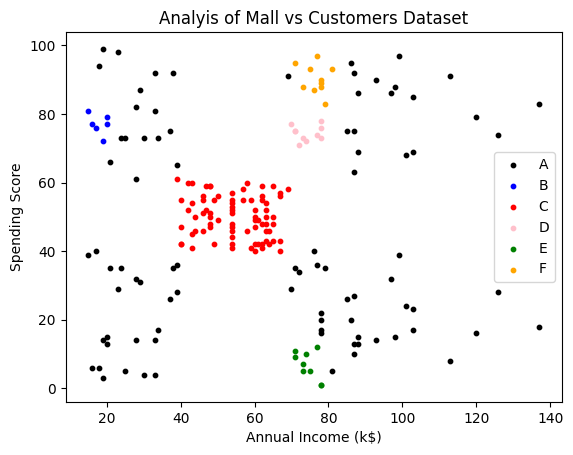

In [383]:
#Visualizing the data
B = list(np.unique(labels))
import matplotlib.pyplot as plt
colors=['black','blue','red','pink','green','orange']
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score")
plt.title("Analyis of Mall vs Customers Dataset")
C = ['A','B','C','D','E','F']
for i in range(len(colors)):
    plt.scatter(df.iloc[labels == B[i],0],df.iloc[labels == B[i],1],s=10,c=colors[i],label=C[i])
plt.legend()
plt.show()

In [385]:
from sklearn.metrics import silhouette_score
silhouette_score(df,labels)

0.1135163893571667